In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [73]:
path = 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [74]:
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [75]:
pdData.shape

(100, 3)

In [76]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

In [77]:
positive.shape

(60, 3)

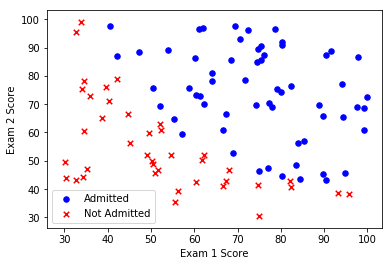

In [78]:
plt.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
plt.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

In [79]:
# sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# model
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

cost,损失函数，对数似然函数的负值的平均值，用于评测算法，越小越好

损失函数 
将对数似然函数去负号 
D(hθ(x),y)=−ylog(hθ(x))−(1−y)log(1−hθ(x)) 
求平均损失
J(θ)=1/n∑D(hθ(xi),yi)

gradient:计算梯度，即每个参数的梯度方向
∂J/∂θj=−1/m∑i=1n(yi−hθ(xi))xij

In [ ]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))


def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)

    return grad

In [80]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    # 设定三种不同的停止策略
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

In [81]:
pdData.insert(0, 'Ones', 1)
# 获取特征矩阵和标签矩阵
orig_data = pdData.values

In [82]:
pdData.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [83]:
cols = orig_data.shape[1]
X = orig_data[:, 0:cols - 1]
y = orig_data[:, cols - 1:cols]
# 初始化参数矩阵
theta = np.zeros([1, 3])

In [84]:
theta

array([[0., 0., 0.]])

In [85]:
# 洗牌，每次梯度下降取样本前要把数据集的顺序打乱
def shuffleData(data):
    # 随机排序函数shuffle
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols - 1]
    y = data[:, cols - 1:]
    return X, y

In [86]:
# 参数迭代更新
def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 梯度下降求解
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)  # 计算的梯度
    costs = [cost(X, y, theta)]  # 损失值

    while True:
        grad = gradient(X[k:k + batchSize], y[k:k + batchSize], theta)
        k += batchSize
        if k >= n:
            k = 0
            X, y = shuffleData(data)  # 重新洗牌
        theta = theta - alpha * grad
        costs.append(cost(X, y, theta))  # 保存损失值
        i += 1

        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad

        if stopCriterion(stopType, value, thresh):
            break

    return theta, i - 1, costs, grad, time.time() - init_time

In [87]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:, 1] > 2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)

    if batchSize == n:
        strDescType = "Gradient"
    elif batchSize == 1:
        strDescType = "Stochastic"
    else:
        strDescType = "Mini-batch ({})".format(batchSize)

    name += strDescType + " descent - Stop: "

    if stopType == STOP_ITER:
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST:
        strStop = "costs change < {}".format(thresh)
    else:
        strStop = "gradient norm < {}".format(thresh)

    name += strStop
    print("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(name, theta, iter, costs[-1], dur))

    # plt.figure(figsize=(200, 150))
    plt.plot(np.arange(len(costs)), costs, 'r')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(name.upper() + ' - Error vs. Iteration')
    plt.show()

    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.99s


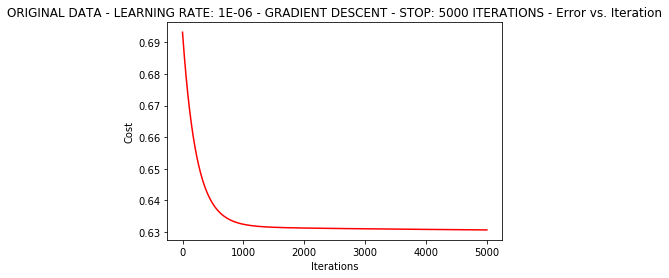

array([[-0.00027127,  0.00705232,  0.00376711]])

In [89]:
n = 100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 21.45s


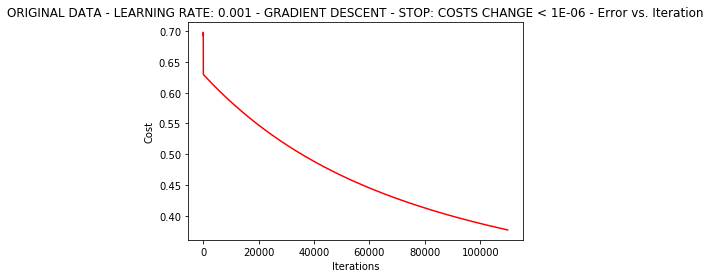

array([[-5.13364014,  0.04771429,  0.04072397]])

In [45]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)